# Logistic Regression Lab

## Task 

- Given a set of pre-classified examples, build a model or classifier to classify new cases.<br>
- Classes are known for the training examples used to build the classifier.<br>
 - $\implies$ Supervised learning problem. <br>
 
## Formalization

We are given a dataset $(X, y)$ of $m$ examples and $n$ attributes (variables).<br>
$$ X \in \mathbb{R}^{m \times n}$$
$$ y \in \{c_1, c_2, ..., c_k\}^{m \times 1} $$
<center> where $ c_1, c_2, ... c_k $ are $k$ predifiened classes. </center> <br>
That is, every training example $x^{i}$ is labeled with a class $y^{i} \in \{c_1, ..., c_k\}$. <br><br>
Our task is to build a logistic regression classifier that is able to classify (label) new instances $x$. <br>

**Bianry Classification :**
- In the case of binary classification : $ y \in \{0, 1\}$
 - 0 for negative class, for example No
 - 1 for positive class, for example Yes


## Cost Function

For one training example $(x^{i}, y^{i})$ :

$$ z^{i} = x^{i}w + b $$ <br>

$$ h_{w,b}(x^{i}) = \hat{y}^{i} = a^{i} = \sigma(z^{i}) = sigmoid(z^{i})$$

The log loss function is defined as :

$$ \mathcal{Loss}(x^{i}, y^{i}) =  - y^{i}  \log(\hat{y}^{i}) - (1-y^{i} )  \log(1-\hat{y}^{i})$$

The cost function is then defined by summing $\mathcal{Loss}$ over all training examples : 

$$ cost (w, b) = J(w, b) = \frac{1}{m} \sum_{i=1}^m \mathcal{Loss}(x^{i}, y^{i})$$ <br>

$$ J(w, b) = - \frac{1}{m} \sum_{i=1}^m y^{i} \log(\hat{y}^{i}) + (1-y^{i} ) \log(1-\hat{y}^{i})$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigmoid function

def sigmoid (z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or array.

    Return:
    s -- sigmoid(z) = 1.0 / (1.0 + exp(-z))
    """
    return 1.0 / (1.0 + np.exp(-z))

In [3]:
def compute_cost(X, y, w, b):
    """
    Compute cost for logistic regression
    
    Arguments:
    X -- Dataset examples, a matrix of size (number of examples , number of predictor variables)
    y -- Labels, a vector of size (number of examples, 1)
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar

    Return:
    cost -- cost for logistic regression
    """
    m = X.shape[0]
    A = sigmoid(np.matmul(X, w) + b)  # This is the h(w, b)
    J = - np.sum(y*np.log(A) + (1-y)*np.log(1-A)) / m
    return J

## Gradient Descent

In this part we implement Gradient Descent Algorithm to fit the logistic regression parameters $w$ and $b$ to our dataset. That is to minimize the cost function.

### Update equations

$$ w_j = w_j - \alpha \frac{\partial J}{\partial w_j} = w_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^i) - y^{i})x_j^i  $$ <br>
$$ b = b - \alpha \frac{\partial J}{\partial b} = b - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{w,b}(x^i) - y^{i}) $$

In [4]:
def gradient_descent (X, y, w, b, alpha, num_iters):
    """
    This function is an implementation of gradient descent 
    to learn parameters w, b for logistic regression 
    to fit the training dataset (X, y)
    
    Arguments:
    X -- Dataset examples, a matrix of size (number of examples , number of variables)
    y -- Labels, a vector of size (number of examples, 1)
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar
    alpha -- learning rate of the gradient descent
    num_iters -- number of iterations of the optimization loop
    
    Returns:
    w, b -- weights w and bias b
    costs -- list of all the costs computed during the optimization.
    """
    m = X.shape[0]
    costs = []
    
    for i in range(num_iters):
        
        A = sigmoid(np.matmul(X, w) + b)
        
        dw = np.matmul(X.T, A - y) / m
        db = np.sum (A - y) / m
                
        w = w - alpha * dw
        b = b - alpha * db
        
        cost = compute_cost(X, y, w, b)
        costs.append(cost)
        
        if i%100 == 0:
            print("Cost after iteration " + str(i+1) + " : " + str(cost))
            
    return w, b, costs

In [5]:
def predict (X, w, b):
    """
    This function predict the class y of a given set of examples X
    using learned parameters w, b.
    
    Arguments:
    X -- data examlpe, an array of size (m, number of attributes)
    w -- weights, a vector of size (number of variables, 1)
    b -- bias, a scalar
    
    
    Returns:
    y -- predicted class {0, 1}, may be a vector
    
    """
    m = X.shape[0]
    yp = np.zeros((m,1))
    A = sigmoid(np.matmul(X, w) + b)
    for i in range(A.shape[0]):
        if A[i, 0] <= 0.5 : yp[i,0] = 0
        else : yp[i,0] = 1
    
    return yp

# Running Logistic Regression

In [6]:
# Dataset for Linear Regression with one variable
#filename = 'tmin_tmax_meknes.txt'
filename = 'data1.txt'

# Read Data
data = np.genfromtxt(filename , delimiter=',' , skip_header = 1)

# Read Header names
f = open(filename, 'r')
names = f.readline().strip().split(',')

n = data.shape[1]
X = data[:, 0:n-1]
y = data[:, n-1]

m = X.shape[0]
n = X.shape[1]

y = y.reshape((m, 1))

print("Number of examples : ", m)
print("Number of attributes : ", n)
print("Variables Name : ", names)
print()
print("X shape : ", X.shape)
print("y shape : ", y.shape)

Number of examples :  100
Number of attributes :  2
Variables Name :  ['Exam 1 score', ' Exam 2 score']

X shape :  (100, 2)
y shape :  (100, 1)


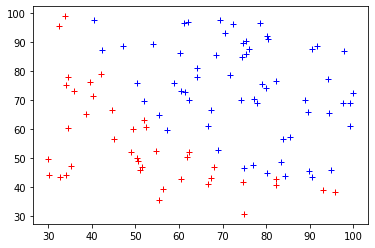

In [7]:
X0=[]
X1=[]
for i in range(m):
    if y[i, 0] == 0 : X0.append(X[i, :])
    else : X1.append(X[i, :])
X0 = np.array(X0)
X1 = np.array(X1)

plt.plot(X0[:, 0], X0[:, 1], 'r+', X1[:, 0], X1[:, 1], 'b+')
plt.show()

In [13]:
# Initialize fitting parameters w and b
w = np.zeros((n, 1))
b = 0

# Compute initial cost
J = compute_cost(X, y, w, b)
print("Initial cost = ", J)

# Set Hyper-parameters alpha and number of iterations
alpha = 0.0015
num_iters = 500000

Initial cost =  0.6931471805599453


In [14]:
# Run Gradient Descent
w, b, costs = gradient_descent (X, y, w, b, alpha, num_iters)

Cost after iteration 1 : 0.84860745214776
Cost after iteration 101 : 0.8614406863313184
Cost after iteration 201 : 0.8608774777279479
Cost after iteration 301 : 0.8603035144017963
Cost after iteration 401 : 0.8597357229861976
Cost after iteration 501 : 0.859174121474961
Cost after iteration 601 : 0.8586187231070042
Cost after iteration 701 : 0.8580695416517957
Cost after iteration 801 : 0.8575265914197786
Cost after iteration 901 : 0.8569898872714549
Cost after iteration 1001 : 0.8564594446267997
Cost after iteration 1101 : 0.8559352794749822
Cost after iteration 1201 : 0.8554174083844547
Cost after iteration 1301 : 0.8549058485133841
Cost after iteration 1401 : 0.8544006176204448
Cost after iteration 1501 : 0.8539017340759879
Cost after iteration 1601 : 0.8534092168736211
Cost after iteration 1701 : 0.8529230856421735
Cost after iteration 1801 : 0.8524433606580901
Cost after iteration 1901 : 0.8519700628582708
Cost after iteration 2001 : 0.851503213853346
Cost after iteration 2101 : 0

Cost after iteration 17701 : 0.9142032922225672
Cost after iteration 17801 : 0.9131652470383312
Cost after iteration 17901 : 0.9121275112496303
Cost after iteration 18001 : 0.9110900865094185
Cost after iteration 18101 : 0.9100529743227195
Cost after iteration 18201 : 0.9090161761757966
Cost after iteration 18301 : 0.9079796935549577
Cost after iteration 18401 : 0.9069435279489624
Cost after iteration 18501 : 0.905907680849248
Cost after iteration 18601 : 0.9048721537499883
Cost after iteration 18701 : 0.9038369481480308
Cost after iteration 18801 : 0.9028020655429075
Cost after iteration 18901 : 0.9017675074368053
Cost after iteration 19001 : 0.9007332753345412
Cost after iteration 19101 : 0.8996993707435537
Cost after iteration 19201 : 0.8986657951738677
Cost after iteration 19301 : 0.8976325501380938
Cost after iteration 19401 : 0.8965996371513867
Cost after iteration 19501 : 0.895567057731434
Cost after iteration 19601 : 0.8945348133984397
Cost after iteration 19701 : 0.89350290567

Cost after iteration 36801 : 0.7233462698351313
Cost after iteration 36901 : 0.7223960516127924
Cost after iteration 37001 : 0.7214464467547663
Cost after iteration 37101 : 0.7204974567866622
Cost after iteration 37201 : 0.7195490832316125
Cost after iteration 37301 : 0.7186013276102468
Cost after iteration 37401 : 0.7176541914406768
Cost after iteration 37501 : 0.7167076762384684
Cost after iteration 37601 : 0.7157617835166243
Cost after iteration 37701 : 0.7148165147855619
Cost after iteration 37801 : 0.7138718715530906
Cost after iteration 37901 : 0.7129278553243941
Cost after iteration 38001 : 0.7119844676020095
Cost after iteration 38101 : 0.7110417098858041
Cost after iteration 38201 : 0.7100995836729587
Cost after iteration 38301 : 0.7091580904579494
Cost after iteration 38401 : 0.7082172317325193
Cost after iteration 38501 : 0.7072770089856713
Cost after iteration 38601 : 0.7063374237036397
Cost after iteration 38701 : 0.705398477369879
Cost after iteration 38801 : 0.7044601714

Cost after iteration 56501 : 0.5497245582132334
Cost after iteration 56601 : 0.5489207311468249
Cost after iteration 56701 : 0.5481177568519006
Cost after iteration 56801 : 0.5473156362332952
Cost after iteration 56901 : 0.5465143701933904
Cost after iteration 57001 : 0.5457139596321384
Cost after iteration 57101 : 0.5449144054470738
Cost after iteration 57201 : 0.544115708533337
Cost after iteration 57301 : 0.5433178697836926
Cost after iteration 57401 : 0.5425208900885498
Cost after iteration 57501 : 0.5417247703359765
Cost after iteration 57601 : 0.5409295114117251
Cost after iteration 57701 : 0.5401351141992495
Cost after iteration 57801 : 0.5393415795797223
Cost after iteration 57901 : 0.5385489084320614
Cost after iteration 58001 : 0.5377571016329421
Cost after iteration 58101 : 0.5369661600568236
Cost after iteration 58201 : 0.5361760845759672
Cost after iteration 58301 : 0.5353868760604538
Cost after iteration 58401 : 0.5345985353782098
Cost after iteration 58501 : 0.5338110633

Cost after iteration 75901 : 0.4107449917841908
Cost after iteration 76001 : 0.4101221615589116
Cost after iteration 76101 : 0.40950035164339427
Cost after iteration 76201 : 0.4088795632638517
Cost after iteration 76301 : 0.40825979766003806
Cost after iteration 76401 : 0.4076410560856345
Cost after iteration 76501 : 0.4070233398086421
Cost after iteration 76601 : 0.40640665011179117
Cost after iteration 76701 : 0.4057909882929618
Cost after iteration 76801 : 0.40517635566562454
Cost after iteration 76901 : 0.4045627535592851
Cost after iteration 77001 : 0.40395018331995997
Cost after iteration 77101 : 0.40333864631065613
Cost after iteration 77201 : 0.40272814391187245
Cost after iteration 77301 : 0.402118677522121
Cost after iteration 77401 : 0.40151024855846523
Cost after iteration 77501 : 0.40090285845707574
Cost after iteration 77601 : 0.4002965086738156
Cost after iteration 77701 : 0.39969120068483394
Cost after iteration 77801 : 0.3990869359871966
Cost after iteration 77901 : 0.

Cost after iteration 94301 : 0.33418219070854266
Cost after iteration 94401 : 0.33409415223080496
Cost after iteration 94501 : 0.33400622451597994
Cost after iteration 94601 : 0.3339184073548494
Cost after iteration 94701 : 0.33383070053871367
Cost after iteration 94801 : 0.3337431038593901
Cost after iteration 94901 : 0.33365561710921243
Cost after iteration 95001 : 0.33356824008102764
Cost after iteration 95101 : 0.3334809725681961
Cost after iteration 95201 : 0.3333938143645887
Cost after iteration 95301 : 0.3333067652645864
Cost after iteration 95401 : 0.33321982506307746
Cost after iteration 95501 : 0.33313299355545695
Cost after iteration 95601 : 0.33304627053762487
Cost after iteration 95701 : 0.33295965580598486
Cost after iteration 95801 : 0.33287314915744176
Cost after iteration 95901 : 0.33278675038940186
Cost after iteration 96001 : 0.3327004592997693
Cost after iteration 96101 : 0.3326142756869465
Cost after iteration 96201 : 0.3325281993498313
Cost after iteration 96301 :

Cost after iteration 112701 : 0.3196558450565139
Cost after iteration 112801 : 0.31958513029629393
Cost after iteration 112901 : 0.3195144951607262
Cost after iteration 113001 : 0.31944393951444106
Cost after iteration 113101 : 0.31937346322237387
Cost after iteration 113201 : 0.3193030661497637
Cost after iteration 113301 : 0.319232748162153
Cost after iteration 113401 : 0.3191625091253861
Cost after iteration 113501 : 0.3190923489056086
Cost after iteration 113601 : 0.31902226736926703
Cost after iteration 113701 : 0.31895226438310736
Cost after iteration 113801 : 0.3188823398141744
Cost after iteration 113901 : 0.31881249352981117
Cost after iteration 114001 : 0.3187427253976578
Cost after iteration 114101 : 0.31867303528565083
Cost after iteration 114201 : 0.3186034230620225
Cost after iteration 114301 : 0.31853388859529985
Cost after iteration 114401 : 0.3184644317543037
Cost after iteration 114501 : 0.3183950524081484
Cost after iteration 114601 : 0.3183257504262403
Cost after it

Cost after iteration 131301 : 0.30774335748600096
Cost after iteration 131401 : 0.3076854090809318
Cost after iteration 131501 : 0.30762751959168055
Cost after iteration 131601 : 0.30756968892752135
Cost after iteration 131701 : 0.30751191699791425
Cost after iteration 131801 : 0.3074542037125052
Cost after iteration 131901 : 0.3073965489811249
Cost after iteration 132001 : 0.30733895271378925
Cost after iteration 132101 : 0.3072814148206981
Cost after iteration 132201 : 0.3072239352122349
Cost after iteration 132301 : 0.30716651379896664
Cost after iteration 132401 : 0.307109150491643
Cost after iteration 132501 : 0.3070518452011962
Cost after iteration 132601 : 0.3069945978387401
Cost after iteration 132701 : 0.3069374083155701
Cost after iteration 132801 : 0.30688027654316263
Cost after iteration 132901 : 0.3068232024331745
Cost after iteration 133001 : 0.3067661858974427
Cost after iteration 133101 : 0.3067092268479841
Cost after iteration 133201 : 0.30665232519699415
Cost after it

Cost after iteration 150201 : 0.2977460957696071
Cost after iteration 150301 : 0.2976978548366247
Cost after iteration 150401 : 0.29764965852034814
Cost after iteration 150501 : 0.2976015067581866
Cost after iteration 150601 : 0.29755339948766585
Cost after iteration 150701 : 0.29750533664642975
Cost after iteration 150801 : 0.2974573181722391
Cost after iteration 150901 : 0.29740934400297003
Cost after iteration 151001 : 0.2973614140766167
Cost after iteration 151101 : 0.29731352833128827
Cost after iteration 151201 : 0.29726568670521003
Cost after iteration 151301 : 0.29721788913672303
Cost after iteration 151401 : 0.2971701355642839
Cost after iteration 151501 : 0.2971224259264632
Cost after iteration 151601 : 0.2970747601619472
Cost after iteration 151701 : 0.2970271382095364
Cost after iteration 151801 : 0.29697956000814574
Cost after iteration 151901 : 0.2969320254968039
Cost after iteration 152001 : 0.2968845346146531
Cost after iteration 152101 : 0.2968370873009491
Cost after i

Cost after iteration 168701 : 0.2895210327861018
Cost after iteration 168801 : 0.28948009084506476
Cost after iteration 168901 : 0.2894391836884166
Cost after iteration 169001 : 0.2893983112713226
Cost after iteration 169101 : 0.28935747354902563
Cost after iteration 169201 : 0.289316670476846
Cost after iteration 169301 : 0.2892759020101805
Cost after iteration 169401 : 0.2892351681045042
Cost after iteration 169501 : 0.2891944687153681
Cost after iteration 169601 : 0.28915380379840006
Cost after iteration 169701 : 0.2891131733093048
Cost after iteration 169801 : 0.2890725772038631
Cost after iteration 169901 : 0.2890320154379323
Cost after iteration 170001 : 0.28899148796744556
Cost after iteration 170101 : 0.2889509947484123
Cost after iteration 170201 : 0.28891053573691705
Cost after iteration 170301 : 0.28887011088912024
Cost after iteration 170401 : 0.28882972016125796
Cost after iteration 170501 : 0.28878936350964113
Cost after iteration 170601 : 0.288749040890656
Cost after ite

Cost after iteration 187101 : 0.2825308778863285
Cost after iteration 187201 : 0.2824956535714928
Cost after iteration 187301 : 0.2824604569442213
Cost after iteration 187401 : 0.2824252879715192
Cost after iteration 187501 : 0.28239014662044515
Cost after iteration 187601 : 0.28235503285811
Cost after iteration 187701 : 0.28231994665167753
Cost after iteration 187801 : 0.28228488796836415
Cost after iteration 187901 : 0.2822498567754387
Cost after iteration 188001 : 0.28221485304022226
Cost after iteration 188101 : 0.2821798767300884
Cost after iteration 188201 : 0.2821449278124624
Cost after iteration 188301 : 0.2821100062548223
Cost after iteration 188401 : 0.28207511202469726
Cost after iteration 188501 : 0.2820402450896687
Cost after iteration 188601 : 0.28200540541736996
Cost after iteration 188701 : 0.28197059297548566
Cost after iteration 188801 : 0.28193580773175203
Cost after iteration 188901 : 0.2819010496539569
Cost after iteration 189001 : 0.2818663187099392
Cost after ite

Cost after iteration 205401 : 0.27651498958383597
Cost after iteration 205501 : 0.27648433135876926
Cost after iteration 205601 : 0.2764536955679258
Cost after iteration 205701 : 0.27642308218645123
Cost after iteration 205801 : 0.276392491189527
Cost after iteration 205901 : 0.276361922552373
Cost after iteration 206001 : 0.2763313762502453
Cost after iteration 206101 : 0.276300852258437
Cost after iteration 206201 : 0.27627035055227794
Cost after iteration 206301 : 0.27623987110713505
Cost after iteration 206401 : 0.2762094138984118
Cost after iteration 206501 : 0.27617897890154813
Cost after iteration 206601 : 0.27614856609202043
Cost after iteration 206701 : 0.27611817544534206
Cost after iteration 206801 : 0.2760878069370621
Cost after iteration 206901 : 0.2760574605427667
Cost after iteration 207001 : 0.27602713623807773
Cost after iteration 207101 : 0.27599683399865355
Cost after iteration 207201 : 0.2759665538001886
Cost after iteration 207301 : 0.2759362956184134
Cost after it

Cost after iteration 223901 : 0.2712008850393881
Cost after iteration 224001 : 0.271173989603457
Cost after iteration 224101 : 0.2711471125697257
Cost after iteration 224201 : 0.27112025391916567
Cost after iteration 224301 : 0.27109341363277606
Cost after iteration 224401 : 0.2710665916915817
Cost after iteration 224501 : 0.2710397880766342
Cost after iteration 224601 : 0.2710130027690112
Cost after iteration 224701 : 0.27098623574981695
Cost after iteration 224801 : 0.2709594870001818
Cost after iteration 224901 : 0.2709327565012629
Cost after iteration 225001 : 0.27090604423424325
Cost after iteration 225101 : 0.2708793501803319
Cost after iteration 225201 : 0.2708526743207641
Cost after iteration 225301 : 0.2708260166368013
Cost after iteration 225401 : 0.27079937710973095
Cost after iteration 225501 : 0.2707727557208665
Cost after iteration 225601 : 0.2707461524515472
Cost after iteration 225701 : 0.2707195672831386
Cost after iteration 225801 : 0.2706930001970316
Cost after itera

Cost after iteration 242401 : 0.2665198585921398
Cost after iteration 242501 : 0.26649606922236857
Cost after iteration 242601 : 0.26647229514233933
Cost after iteration 242701 : 0.2664485363372344
Cost after iteration 242801 : 0.26642479279225534
Cost after iteration 242901 : 0.26640106449262363
Cost after iteration 243001 : 0.26637735142357954
Cost after iteration 243101 : 0.266353653570383
Cost after iteration 243201 : 0.2663299709183129
Cost after iteration 243301 : 0.26630630345266754
Cost after iteration 243401 : 0.26628265115876426
Cost after iteration 243501 : 0.2662590140219398
Cost after iteration 243601 : 0.2662353920275499
Cost after iteration 243701 : 0.26621178516096944
Cost after iteration 243801 : 0.2661881934075922
Cost after iteration 243901 : 0.2661646167528312
Cost after iteration 244001 : 0.26614105518211845
Cost after iteration 244101 : 0.26611750868090495
Cost after iteration 244201 : 0.26609397723466055
Cost after iteration 244301 : 0.266070460828874
Cost after 

Cost after iteration 261001 : 0.2623433428110695
Cost after iteration 261101 : 0.26232216141950715
Cost after iteration 261201 : 0.26230099286434144
Cost after iteration 261301 : 0.2622798371338725
Cost after iteration 261401 : 0.26225869421641473
Cost after iteration 261501 : 0.26223756410029725
Cost after iteration 261601 : 0.26221644677386313
Cost after iteration 261701 : 0.26219534222547003
Cost after iteration 261801 : 0.26217425044348963
Cost after iteration 261901 : 0.26215317141630834
Cost after iteration 262001 : 0.2621321051323267
Cost after iteration 262101 : 0.26211105157995923
Cost after iteration 262201 : 0.26209001074763494
Cost after iteration 262301 : 0.26206898262379696
Cost after iteration 262401 : 0.2620479671969026
Cost after iteration 262501 : 0.2620269644554236
Cost after iteration 262601 : 0.2620059743878452
Cost after iteration 262701 : 0.2619849969826674
Cost after iteration 262801 : 0.26196403222840403
Cost after iteration 262901 : 0.2619430801135829
Cost aft

Cost after iteration 279801 : 0.25857481533502763
Cost after iteration 279901 : 0.25855585617214477
Cost after iteration 280001 : 0.25853690787691486
Cost after iteration 280101 : 0.2585179704399954
Cost after iteration 280201 : 0.2584990438520545
Cost after iteration 280301 : 0.25848012810377086
Cost after iteration 280401 : 0.2584612231858343
Cost after iteration 280501 : 0.2584423290889454
Cost after iteration 280601 : 0.25842344580381527
Cost after iteration 280701 : 0.25840457332116623
Cost after iteration 280801 : 0.2583857116317311
Cost after iteration 280901 : 0.25836686072625326
Cost after iteration 281001 : 0.2583480205954872
Cost after iteration 281101 : 0.25832919123019804
Cost after iteration 281201 : 0.25831037262116135
Cost after iteration 281301 : 0.25829156475916365
Cost after iteration 281401 : 0.2582727676350018
Cost after iteration 281501 : 0.25825398123948373
Cost after iteration 281601 : 0.25823520556342755
Cost after iteration 281701 : 0.2582164405976623
Cost aft

Cost after iteration 298401 : 0.2552260275846682
Cost after iteration 298501 : 0.255208939794853
Cost after iteration 298601 : 0.2551918613061599
Cost after iteration 298701 : 0.2551747921110186
Cost after iteration 298801 : 0.255157732201867
Cost after iteration 298901 : 0.2551406815711516
Cost after iteration 299001 : 0.2551236402113268
Cost after iteration 299101 : 0.25510660811485547
Cost after iteration 299201 : 0.25508958527420905
Cost after iteration 299301 : 0.25507257168186687
Cost after iteration 299401 : 0.25505556733031653
Cost after iteration 299501 : 0.2550385722120541
Cost after iteration 299601 : 0.25502158631958366
Cost after iteration 299701 : 0.2550046096454178
Cost after iteration 299801 : 0.254987642182077
Cost after iteration 299901 : 0.2549706839220901
Cost after iteration 300001 : 0.2549537348579942
Cost after iteration 300101 : 0.25493679498233446
Cost after iteration 300201 : 0.25491986428766417
Cost after iteration 300301 : 0.2549029427665449
Cost after itera

Cost after iteration 316801 : 0.2522311022703937
Cost after iteration 316901 : 0.2522156064343115
Cost after iteration 317001 : 0.25220011863563846
Cost after iteration 317101 : 0.2521846388681602
Cost after iteration 317201 : 0.25216916712566856
Cost after iteration 317301 : 0.25215370340196214
Cost after iteration 317401 : 0.2521382476908457
Cost after iteration 317501 : 0.25212279998613074
Cost after iteration 317601 : 0.2521073602816353
Cost after iteration 317701 : 0.2520919285711835
Cost after iteration 317801 : 0.2520765048486062
Cost after iteration 317901 : 0.2520610891077407
Cost after iteration 318001 : 0.2520456813424306
Cost after iteration 318101 : 0.2520302815465256
Cost after iteration 318201 : 0.25201488971388275
Cost after iteration 318301 : 0.25199950583836456
Cost after iteration 318401 : 0.25198412991384034
Cost after iteration 318501 : 0.25196876193418566
Cost after iteration 318601 : 0.2519534018932827
Cost after iteration 318701 : 0.2519380497850194
Cost after i

Cost after iteration 335101 : 0.24952324767341286
Cost after iteration 335201 : 0.24950912535064348
Cost after iteration 335301 : 0.24949501002813357
Cost after iteration 335401 : 0.24948090170072734
Cost after iteration 335501 : 0.24946680036327348
Cost after iteration 335601 : 0.249452706010626
Cost after iteration 335701 : 0.24943861863764405
Cost after iteration 335801 : 0.24942453823919208
Cost after iteration 335901 : 0.24941046481013956
Cost after iteration 336001 : 0.2493963983453606
Cost after iteration 336101 : 0.24938233883973493
Cost after iteration 336201 : 0.24936828628814778
Cost after iteration 336301 : 0.24935424068548798
Cost after iteration 336401 : 0.24934020202665078
Cost after iteration 336501 : 0.24932617030653603
Cost after iteration 336601 : 0.24931214552004877
Cost after iteration 336701 : 0.24929812766209886
Cost after iteration 336801 : 0.24928411672760137
Cost after iteration 336901 : 0.2492701127114766
Cost after iteration 337001 : 0.24925611560864935
Cost

Cost after iteration 353601 : 0.24702464093482465
Cost after iteration 353701 : 0.24701173093974135
Cost after iteration 353801 : 0.24699882707208812
Cost after iteration 353901 : 0.2469859293275575
Cost after iteration 354001 : 0.24697303770184642
Cost after iteration 354101 : 0.24696015219065562
Cost after iteration 354201 : 0.24694727278969
Cost after iteration 354301 : 0.24693439949465879
Cost after iteration 354401 : 0.24692153230127492
Cost after iteration 354501 : 0.24690867120525528
Cost after iteration 354601 : 0.2468958162023217
Cost after iteration 354701 : 0.246882967288199
Cost after iteration 354801 : 0.24687012445861664
Cost after iteration 354901 : 0.2468572877093079
Cost after iteration 355001 : 0.2468444570360103
Cost after iteration 355101 : 0.24683163243446507
Cost after iteration 355201 : 0.24681881390041796
Cost after iteration 355301 : 0.24680600142961823
Cost after iteration 355401 : 0.24679319501781954
Cost after iteration 355501 : 0.2467803946607793
Cost after

Cost after iteration 372101 : 0.24473629388545806
Cost after iteration 372201 : 0.24472444817960048
Cost after iteration 372301 : 0.2447126078691396
Cost after iteration 372401 : 0.24470077295044793
Cost after iteration 372501 : 0.24468894341990124
Cost after iteration 372601 : 0.24467711927387878
Cost after iteration 372701 : 0.24466530050876278
Cost after iteration 372801 : 0.24465348712093943
Cost after iteration 372901 : 0.24464167910679704
Cost after iteration 373001 : 0.24462987646272846
Cost after iteration 373101 : 0.24461807918512876
Cost after iteration 373201 : 0.24460628727039688
Cost after iteration 373301 : 0.24459450071493472
Cost after iteration 373401 : 0.2445827195151478
Cost after iteration 373501 : 0.24457094366744456
Cost after iteration 373601 : 0.24455917316823694
Cost after iteration 373701 : 0.24454740801393984
Cost after iteration 373801 : 0.24453564820097146
Cost after iteration 373901 : 0.24452389372575353
Cost after iteration 374001 : 0.2445121445847106
Cos

Cost after iteration 390501 : 0.24264396199180285
Cost after iteration 390601 : 0.24263305116318737
Cost after iteration 390701 : 0.2426221451143117
Cost after iteration 390801 : 0.24261124384209565
Cost after iteration 390901 : 0.24260034734346145
Cost after iteration 391001 : 0.24258945561533427
Cost after iteration 391101 : 0.2425785686546417
Cost after iteration 391201 : 0.2425676864583141
Cost after iteration 391301 : 0.24255680902328458
Cost after iteration 391401 : 0.24254593634648894
Cost after iteration 391501 : 0.24253506842486539
Cost after iteration 391601 : 0.24252420525535495
Cost after iteration 391701 : 0.2425133468349014
Cost after iteration 391801 : 0.24250249316045114
Cost after iteration 391901 : 0.242491644228953
Cost after iteration 392001 : 0.24248080003735853
Cost after iteration 392101 : 0.24246996058262227
Cost after iteration 392201 : 0.24245912586170085
Cost after iteration 392301 : 0.24244829587155403
Cost after iteration 392401 : 0.2424374706091438
Cost af

Cost after iteration 409001 : 0.24070373348212784
Cost after iteration 409101 : 0.2406936571259566
Cost after iteration 409201 : 0.24068358502236376
Cost after iteration 409301 : 0.24067351716871793
Cost after iteration 409401 : 0.24066345356239022
Cost after iteration 409501 : 0.24065339420075374
Cost after iteration 409601 : 0.24064333908118404
Cost after iteration 409701 : 0.24063328820105853
Cost after iteration 409801 : 0.24062324155775705
Cost after iteration 409901 : 0.2406131991486615
Cost after iteration 410001 : 0.24060316097115603
Cost after iteration 410101 : 0.24059312702262695
Cost after iteration 410201 : 0.24058309730046262
Cost after iteration 410301 : 0.2405730718020537
Cost after iteration 410401 : 0.2405630505247931
Cost after iteration 410501 : 0.24055303346607587
Cost after iteration 410601 : 0.2405430206232991
Cost after iteration 410701 : 0.24053301199386212
Cost after iteration 410801 : 0.24052300757516637
Cost after iteration 410901 : 0.2405130073646154
Cost a

Cost after iteration 427601 : 0.23890002233426816
Cost after iteration 427701 : 0.2388906938970197
Cost after iteration 427801 : 0.23888136925839876
Cost after iteration 427901 : 0.23887204841614573
Cost after iteration 428001 : 0.23886273136800226
Cost after iteration 428101 : 0.23885341811171226
Cost after iteration 428201 : 0.23884410864502104
Cost after iteration 428301 : 0.2388348029656762
Cost after iteration 428401 : 0.2388255010714268
Cost after iteration 428501 : 0.2388162029600238
Cost after iteration 428601 : 0.23880690862921988
Cost after iteration 428701 : 0.23879761807676964
Cost after iteration 428801 : 0.2387883313004294
Cost after iteration 428901 : 0.23877904829795737
Cost after iteration 429001 : 0.23876976906711342
Cost after iteration 429101 : 0.2387604936056592
Cost after iteration 429201 : 0.2387512219113585
Cost after iteration 429301 : 0.23874195398197626
Cost after iteration 429401 : 0.23873268981527984
Cost after iteration 429501 : 0.23872342940903812
Cost af

Cost after iteration 446301 : 0.2372193290415354
Cost after iteration 446401 : 0.23721067350148606
Cost after iteration 446501 : 0.2372020213670979
Cost after iteration 446601 : 0.23719337263642026
Cost after iteration 446701 : 0.2371847273075035
Cost after iteration 446801 : 0.2371760853783997
Cost after iteration 446901 : 0.2371674468471628
Cost after iteration 447001 : 0.2371588117118477
Cost after iteration 447101 : 0.2371501799705109
Cost after iteration 447201 : 0.23714155162121092
Cost after iteration 447301 : 0.2371329266620073
Cost after iteration 447401 : 0.23712430509096089
Cost after iteration 447501 : 0.23711568690613444
Cost after iteration 447601 : 0.2371070721055922
Cost after iteration 447701 : 0.2370984606873996
Cost after iteration 447801 : 0.23708985264962362
Cost after iteration 447901 : 0.23708124799033306
Cost after iteration 448001 : 0.23707264670759795
Cost after iteration 448101 : 0.23706404879948972
Cost after iteration 448201 : 0.23705545426408134
Cost after

Cost after iteration 464901 : 0.2356660044757305
Cost after iteration 465001 : 0.23565795034313503
Cost after iteration 465101 : 0.23564989927774785
Cost after iteration 465201 : 0.23564185127787407
Cost after iteration 465301 : 0.23563380634182052
Cost after iteration 465401 : 0.2356257644678952
Cost after iteration 465501 : 0.23561772565440708
Cost after iteration 465601 : 0.23560968989966655
Cost after iteration 465701 : 0.2356016572019855
Cost after iteration 465801 : 0.2355936275596765
Cost after iteration 465901 : 0.23558560097105388
Cost after iteration 466001 : 0.2355775774344331
Cost after iteration 466101 : 0.23556955694813084
Cost after iteration 466201 : 0.2355615395104649
Cost after iteration 466301 : 0.23555352511975447
Cost after iteration 466401 : 0.23554551377432006
Cost after iteration 466501 : 0.23553750547248323
Cost after iteration 466601 : 0.2355295002125669
Cost after iteration 466701 : 0.23552149799289515
Cost after iteration 466801 : 0.23551349881179356
Cost af

Cost after iteration 483501 : 0.23421897766401234
Cost after iteration 483601 : 0.2342114661498115
Cost after iteration 483701 : 0.23420395740809336
Cost after iteration 483801 : 0.2341964514373785
Cost after iteration 483901 : 0.2341889482361884
Cost after iteration 484001 : 0.23418144780304564
Cost after iteration 484101 : 0.23417395013647407
Cost after iteration 484201 : 0.23416645523499857
Cost after iteration 484301 : 0.23415896309714487
Cost after iteration 484401 : 0.23415147372143988
Cost after iteration 484501 : 0.23414398710641143
Cost after iteration 484601 : 0.23413650325058863
Cost after iteration 484701 : 0.23412902215250156
Cost after iteration 484801 : 0.23412154381068118
Cost after iteration 484901 : 0.2341140682236597
Cost after iteration 485001 : 0.23410659538997042
Cost after iteration 485101 : 0.23409912530814755
Cost after iteration 485201 : 0.2340916579767262
Cost after iteration 485301 : 0.23408419339424305
Cost after iteration 485401 : 0.23407673155923536
Cost 

In [15]:
# Print learned parameters 
print("W = ", w)
print("b = ", b)

W =  [[0.11735113]
 [0.11143969]]
b =  -14.024578177281427


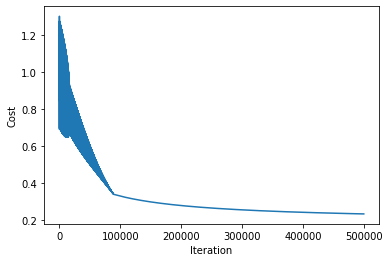

In [16]:
# Visualize costs over iterations

iters = np.arange(len(costs))
plt.plot(iters, costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

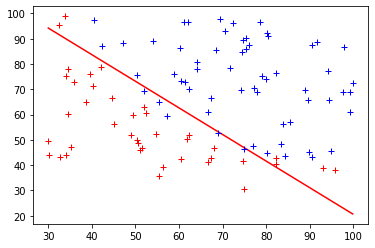

In [17]:
# Plot Decision boundary

xl = np.array([np.min(X[:, 0]), np.max(X[:, 0])])
yl = -(xl * w[0, 0] + b) / w[1, 0]
plt.plot(xl, yl, 'r')


X0=[]
X1=[]
for i in range(m):
    if y[i, 0] == 0 : X0.append(X[i, :])
    else : X1.append(X[i, :])
X0 = np.array(X0)
X1 = np.array(X1)

plt.plot(X0[:, 0], X0[:, 1], 'r+', X1[:, 0], X1[:, 1], 'b+')
plt.show()

# Cat - Not Cat Example

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from util_functions import load_dataset

In [19]:
# Loading the dataset cat vs non-cat : train and test 
X_train, y_train, X_test, y_test, classes = load_dataset()

y_train = y_train.T
y_test = y_test.T


m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
X_train shape: (209, 64, 64, 3)
y_train shape: (209, 1)
X_test shape: (50, 64, 64, 3)
y_test shape: (50, 1)


y = [1], it's a 'cat' picture.


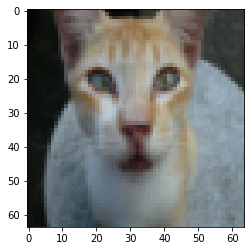

In [21]:
# Example of a picture
index = 11
plt.imshow(X_train[index])
print ("y = " + str(y_train[index, :]) + ", it's a '" + classes[np.squeeze(y_train[index, :])].decode("utf-8") +  "' picture.")

In [22]:
def display_iamges(X, image_size = 10, border_size = 1, title = ""):
    
    num_px = X.shape[1]
    n = int(np.sqrt(X.shape[0]))
    
    lh = 255 * np.ones((border_size , num_px , 3), dtype='int')
    lv = 255 * np.ones((num_px , border_size , 3), dtype='int')
        
    lhb = 255 * np.ones((border_size , n*num_px + (n+1)*border_size , 3), dtype='int')
    
    img = np.copy(lhb)
    
    for i in range(0, n):
        line = np.hstack((lv, X[i*n], lv))
        for j in range(1, n):
            line = np.hstack((line, X[i*n + j], lv))
        img = np.vstack((img, line))
        img = np.vstack((img, lhb))
    
    plt.figure(figsize = (image_size , image_size))
    plt.imshow(img)
    if title : print('\n' + title)


Cat vs non-cat images


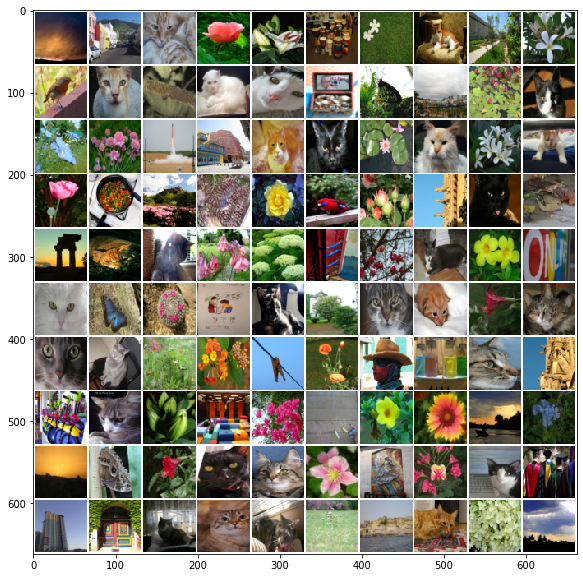

In [23]:
im = display_iamges(X_train[0:100], border_size = 2, title = 'Cat vs non-cat images')

In [24]:
# Reshape the training and test examples

X_train_flatten = X_train.reshape(X_train.shape[0], -1) / 255
X_test_flatten  = X_test.reshape(X_test.shape[0], -1) / 255

print ("X_train_flatten shape: " + str(X_train_flatten.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test_flatten shape: " + str(X_test_flatten.shape))
print ("y_test shape: " + str(y_test.shape))

X_train_flatten shape: (209, 12288)
y_train shape: (209, 1)
X_test_flatten shape: (50, 12288)
y_test shape: (50, 1)


In [25]:
# Initialize fitting parameters w and b
w = np.zeros((X_train_flatten.shape[1], 1))
b = 0

# Compute initial cost
J = compute_cost(X_train_flatten, y_train, w, b)
print("Initial cost = ", J)

# Set Hyper-parameters alpha and number of iterations
alpha = 0.005
num_iters = 2000

Initial cost =  0.6931471805599453


In [26]:
# Run Gradient Descent
w, b, costs = gradient_descent (X_train_flatten, y_train, w, b, alpha, num_iters)
y_pred = predict(X_train_flatten, w, b)


# Predict test/train set examples
yp_test = predict(X_test_flatten, w, b)
yp_train = predict(X_train_flatten, w, b)

# Print train/test accuracy
print()
print("train accuracy: ", 100 - np.mean(np.abs(yp_train - y_train)) * 100, '%')
print("test accuracy: ", 100 - np.mean(np.abs(yp_test - y_test) * 100))

Cost after iteration 1 : 0.7410294145065183
Cost after iteration 101 : 0.6410067980194971
Cost after iteration 201 : 0.48227399739198706
Cost after iteration 301 : 0.3762109204467301
Cost after iteration 401 : 0.3311518598069663
Cost after iteration 501 : 0.30301793648415537
Cost after iteration 601 : 0.2796652478708955
Cost after iteration 701 : 0.2598586978922398
Cost after iteration 801 : 0.2427814005811665
Cost after iteration 901 : 0.22786429176264977
Cost after iteration 1001 : 0.21469540061977457
Cost after iteration 1101 : 0.2029672193407739
Cost after iteration 1201 : 0.19244437611878734
Cost after iteration 1301 : 0.18294287179454838
Cost after iteration 1401 : 0.17431625047826718
Cost after iteration 1501 : 0.1664461064625557
Cost after iteration 1601 : 0.15923539935728237
Cost after iteration 1701 : 0.15260364205090274
Cost after iteration 1801 : 0.1464833692041853
Cost after iteration 1901 : 0.14081750029565923

train accuracy:  99.04306220095694 %
test accuracy:  70.0


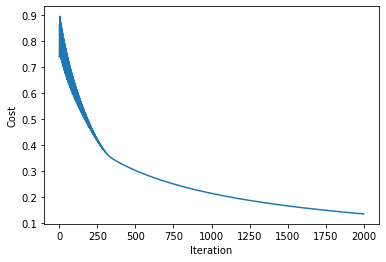

In [27]:
# Visualize costs over iterations

iters = np.arange(len(costs))
plt.plot(iters, costs)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

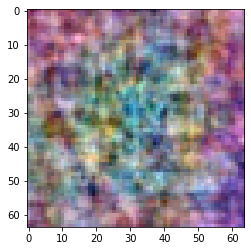

In [28]:
# Visualize weights :
wv = (w.reshape((64, 64, 3)) - np.min(w)) / (np.max(w) - np.min(w))
plt.imshow(wv)